# **UNVEILING THE ANDROID APP MARKET**

# DATA LOADING

**Loading Apps Dataset**

In [79]:
import pandas as pd

# Load the apps dataset into a Pandas DataFrame
apps_df = pd.read_csv('/content/apps.csv')

# Display the first few rows of the apps dataset to verify it has loaded correctly
print(apps_df.head())


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

**Loading User Review Dataset**

In [80]:
# Load the user reviews dataset into a Pandas DataFrame
reviews_df = pd.read_csv('/content/user_reviews.csv')

# Display the first few rows of the reviews dataset to verify it has loaded correctly
print(reviews_df.head())


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [81]:
apps_df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [82]:
reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

# Data Cleaning

**Checking null values**

In [83]:
# Checking for null values in each column
null_counts = apps_df.isnull().sum()
print(null_counts)


Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


**Handling Missing Values**

In [84]:
apps_df.dropna(inplace=True)

**Imputing Null Values**

In [85]:
# Replace null values in 'Rating' column with mean
mean_rating = apps_df['Rating'].mean()
apps_df['Rating'].fillna(mean_rating, inplace=True)


In [86]:
print("\nCleaned DataFrame:")
print(apps_df.head())


Cleaned DataFrame:
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & De

**Standardizing Data Formats**

In [87]:
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

In [88]:
# Remove currency symbols and convert to float
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

In [89]:
# Merge datasets on 'App' column
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')
# Drop duplicates
merged_df.drop_duplicates(inplace=True)

# Handling null values
merged_df.dropna(inplace=True)  # Adjust as per your specific data requirements

# Convert 'Last Updated' to datetime format
merged_df['Last Updated'] = pd.to_datetime(merged_df['Last Updated'])

# Convert 'Price' to float format if necessary
# Remove currency symbols (if any) and convert to float
merged_df['Price'] = merged_df['Price'].astype(str).str.replace('$', '').astype(float)

merged_df['Translated_Review'] = merged_df['Translated_Review'].str.lower()

# Display the cleaned and standardized merged DataFrame
print(merged_df.head())

   Unnamed: 0                  App        Category  Rating  Reviews  Size  \
0           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
1           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
2           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
4           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
5           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   

   Installs  Type  Price Content Rating                     Genres  \
0  500,000+  Free    0.0       Everyone  Art & Design;Pretend Play   
1  500,000+  Free    0.0       Everyone  Art & Design;Pretend Play   
2  500,000+  Free    0.0       Everyone  Art & Design;Pretend Play   
4  500,000+  Free    0.0       Everyone  Art & Design;Pretend Play   
5  500,000+  Free    0.0       Everyone  Art & Design;Pretend Play   

  Last Updated Current Ver   Android Ver  \
0   2018-01-15       2.0.0  4.0.3 and up   
1   2018-01-15       2.0.0  

**Handling Outliers**

In [90]:

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier handling to specific numeric columns in reviews_df
numeric_columns = ['Sentiment_Polarity', 'Sentiment_Subjectivity']
for col in numeric_columns:
    reviews_df = handle_outliers(reviews_df, col)

# Display the cleaned reviews DataFrame after handling outliers
print(reviews_df.head())


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  


# Exploratory Data Analysis

**Univariate Analysis for Apps Dataset**

*Category Distribution*

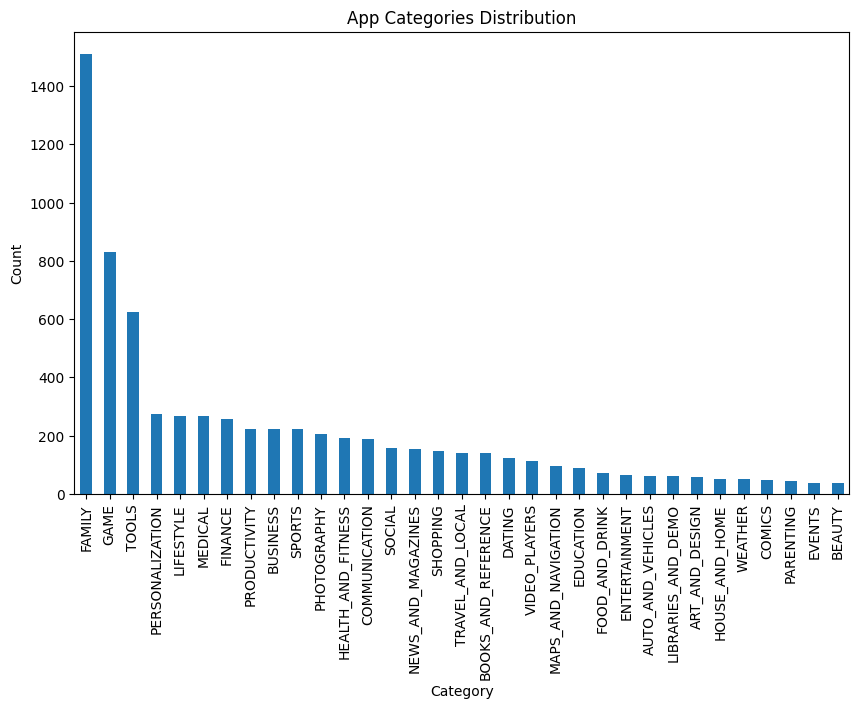

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category Distribution
plt.figure(figsize=(10, 6))
apps_df['Category'].value_counts().plot(kind='bar')
plt.title('App Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The 'Family' category within the Apps Dataset contains a total of 1400 apps. This category primarily includes applications designed for family-oriented use, such as educational apps, games suitable for children, and family-oriented utilities.

*Rating Distribution*

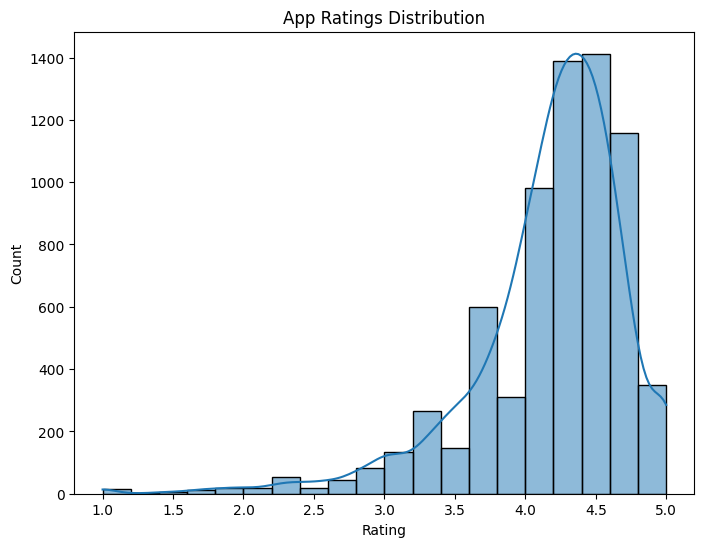

In [92]:
# Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The Apps Dataset includes a diverse range of applications, and those with ratings between 4.0 and 4.5 represent highly regarded choices among users. These ratings indicate strong user satisfaction and positive reception across various app categories.

**Univariate Analysis for Reviews Dataset**

*Sentiment Distribution*

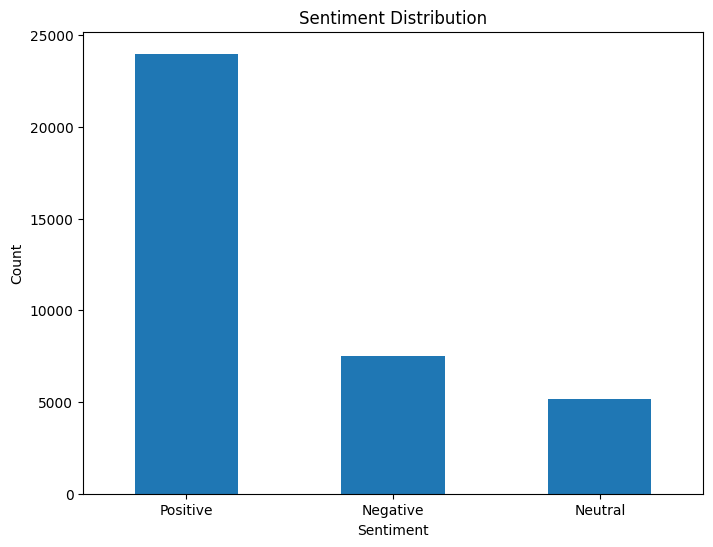

In [93]:
# Sentiment Distribution
plt.figure(figsize=(8, 6))
reviews_df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


The sentiment distribution analysis of the Reviews Dataset (reviews_df) reveals a notable concentration of positive sentiments among users.

*Sentiment Polarity Distribution*

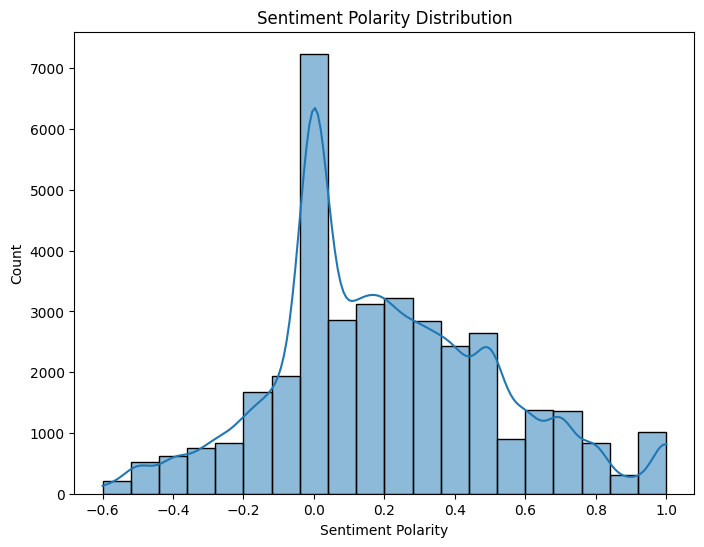

In [94]:
# Sentiment Polarity Distribution
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Sentiment_Polarity'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

The sentiment polarity distribution analysis of the Reviews Dataset (reviews_df) highlights varying degrees of sentiment polarities among user reviews.

**Bivariate Analysis for apps DataSet**

*Rating vs. Price*

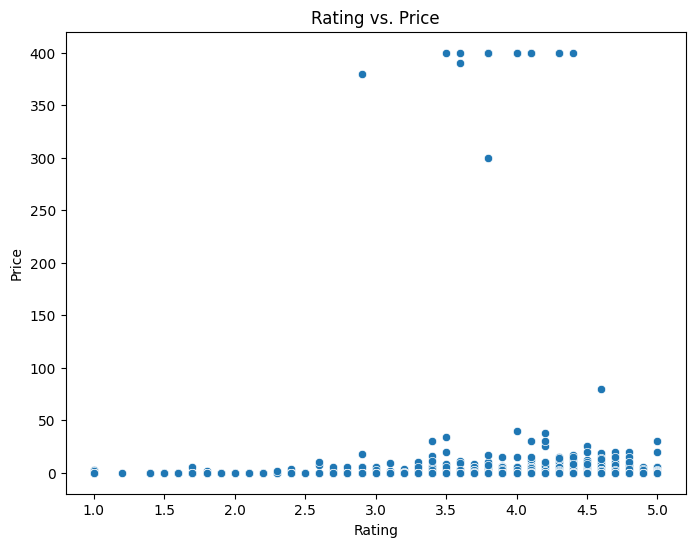

In [95]:
# Rating vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Price', data=apps_df)
plt.title('Rating vs. Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

The scatter plot's concentration in the lower price range suggests that app developers often price their apps competitively or offer them for free, possibly to attract more downloads or users.

*Rating vs. Number of Reviews*

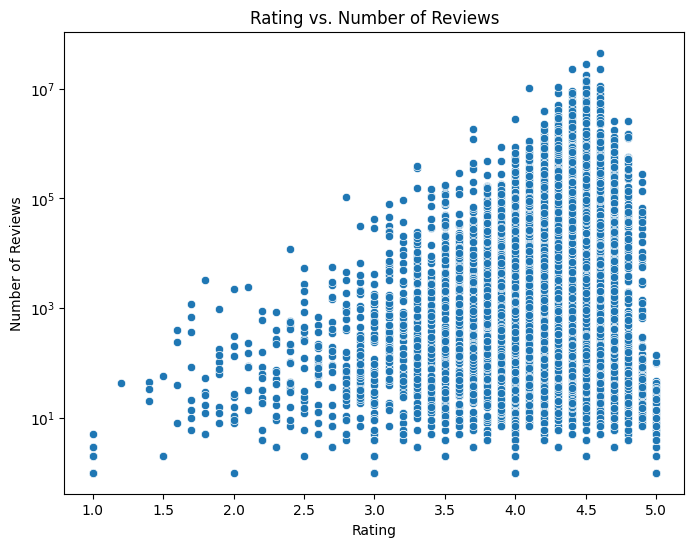

In [96]:
# Rating vs. Number of Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Reviews', data=apps_df)
plt.title('Rating vs. Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.yscale('log')  # Use log scale for better visualization if reviews vary widely
plt.show()

Apps with ratings of 4.0 to 4.5 and 5.0 receive a larger number of reviews. This trend indicates that users are more likely to review apps that they find highly satisfactory or exceptional.

**Bivariate Analysis for Reviews Dataset**

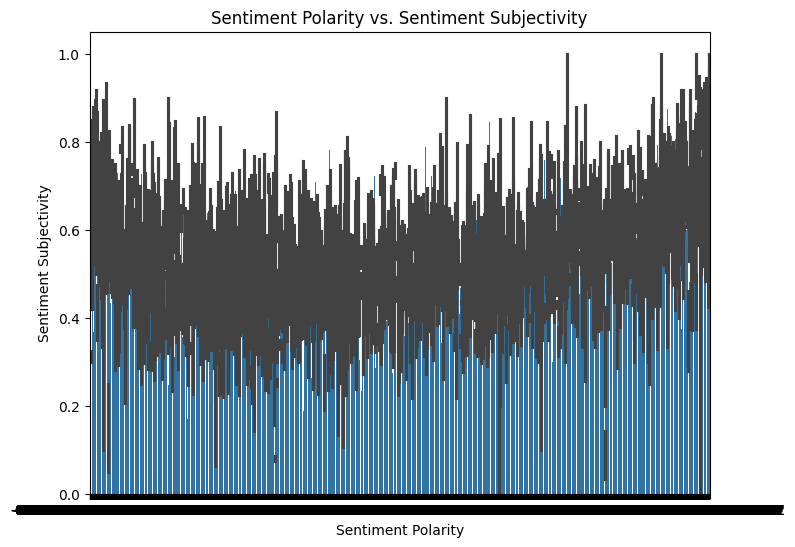

In [97]:
# Sentiment Polarity vs. Sentiment Subjectivity
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', data=reviews_df)
plt.title('Sentiment Polarity vs. Sentiment Subjectivity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.show()

Reviews with sentiment subjectivity scores between 0.4 to 0.8 indicate that many reviews express opinions or sentiments that are more subjective rather than objective.

**Corelation Matrix for Apps**

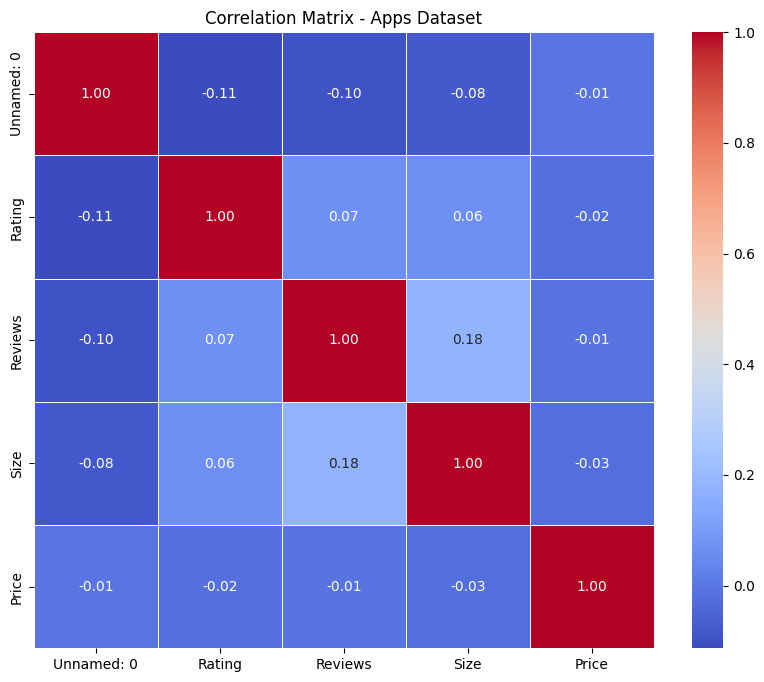

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Selecting numerical columns for correlation analysis
numeric_columns_apps = apps_df.select_dtypes(include=['float64', 'int64']).columns

# Calculating correlation matrix
correlation_matrix_apps = apps_df[numeric_columns_apps].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_apps, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix - Apps Dataset')
plt.show()


**Correlation Matrix for reviews**

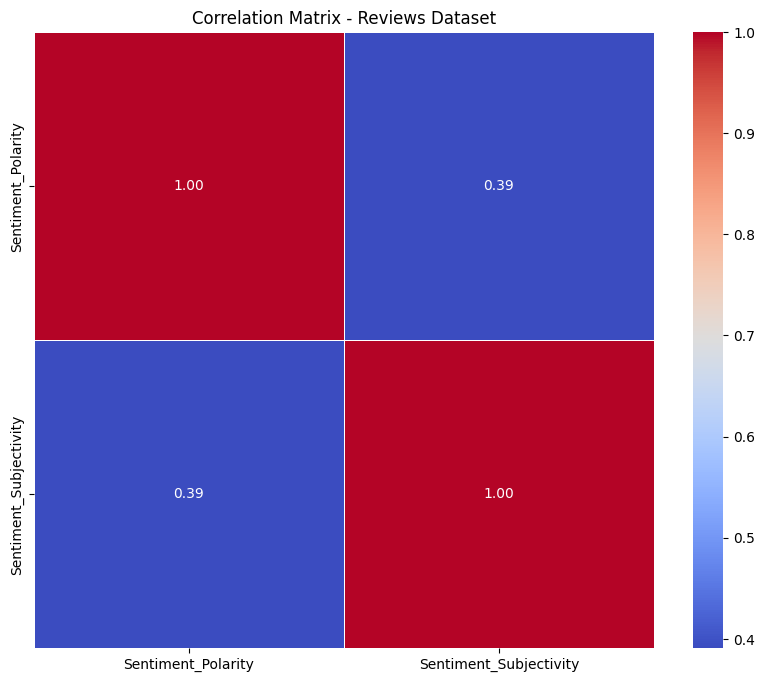

In [99]:

# Selecting numerical columns for correlation analysis
numeric_columns_reviews = reviews_df.select_dtypes(include=['float64', 'int64']).columns

# Calculating correlation matrix
correlation_matrix_reviews = reviews_df[numeric_columns_reviews].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reviews, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix - Reviews Dataset')
plt.show()


# Metrics Analysis on Apps Dataset

In [100]:

# Selecting numerical columns for metrics analysis
metrics_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

# Calculating descriptive statistics
metrics_stats = apps_df[metrics_columns].describe()

# Displaying the descriptive statistics
print("Descriptive Statistics for Metrics in apps_df:")
print(metrics_stats)


Descriptive Statistics for Metrics in apps_df:
            Rating       Reviews         Size        Price
count  7021.000000  7.021000e+03  7021.000000  7021.000000
mean      4.160704  1.448960e+05    21.767597     1.174222
std       0.559241  1.024428e+06    22.731237    18.205355
min       1.000000  1.000000e+00     0.000000     0.000000
25%       4.000000  8.400000e+01     4.900000     0.000000
50%       4.300000  1.546000e+03    13.000000     0.000000
75%       4.500000  2.658700e+04    31.000000     0.000000
max       5.000000  4.489172e+07   100.000000   400.000000


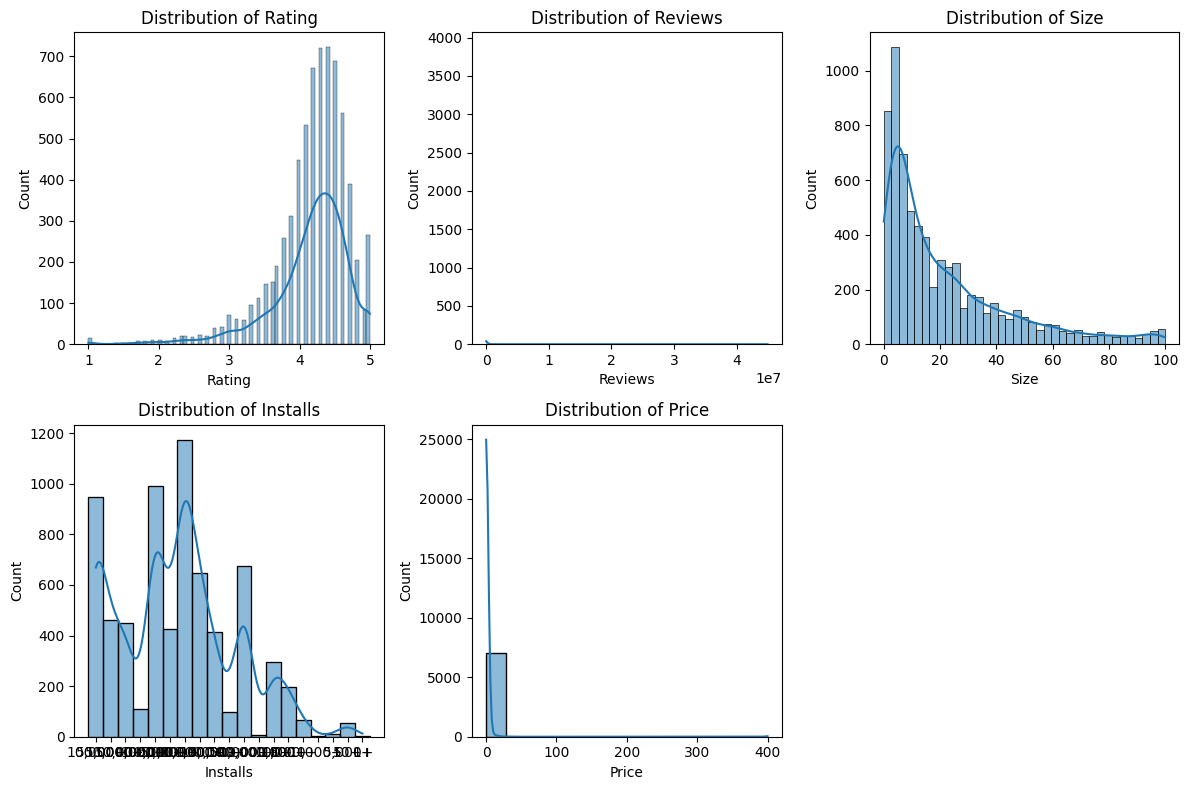

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing distributions or trends for selected metrics
plt.figure(figsize=(12, 8))

for i, col in enumerate(metrics_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(apps_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Apps in 4.0 to 4.5 rating range are generally perceived positively by users, indicating high user satisfaction and likely delivering on user expectations.
Apps with larger sizes in this range might include features such as extensive content, high-resolution graphics, or complex functionalities.

# Sentiment Analysis

In [102]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize NLTK's VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def analyze_sentiment(review):
    # Handle potential non-string reviews
    if not isinstance(review, str):
        return None  # Or any default value you prefer for non-string reviews
    scores = sid.polarity_scores(review)
    return scores['compound']

# Apply sentiment analysis to each review in reviews_df
reviews_df['Sentiment_Score'] = reviews_df['Translated_Review'].apply(analyze_sentiment)

# Display a sample of sentiment analysis results
print(reviews_df[['Translated_Review', 'Sentiment_Score']].head(10))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                    Translated_Review  Sentiment_Score
0   I like eat delicious food. That's I'm cooking ...           0.9531
1     This help eating healthy exercise regular basis           0.6597
3          Works great especially going grocery store           0.6249
4                                        Best idea us           0.6369
5                                            Best way           0.6369
6                                             Amazing           0.5859
8                                Looking forward app,           0.0000
9               It helpful site ! It help foods get !           0.7256
10                                          good you.           0.4404
11  Useful information The amount spelling errors ...           0.4404


The majority of the provided text snippets convey positive sentiments, with sentiment scores ranging from 0.4404 to 0.7256.
One snippet is neutral with a sentiment score of 0.0000.
Positive sentiments dominate, indicating generally favorable opinions expressed in the text snippets analyzed.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Sentiment Score: 0.36
Number of Positive Reviews: 25460
Number of Negative Reviews: 6854


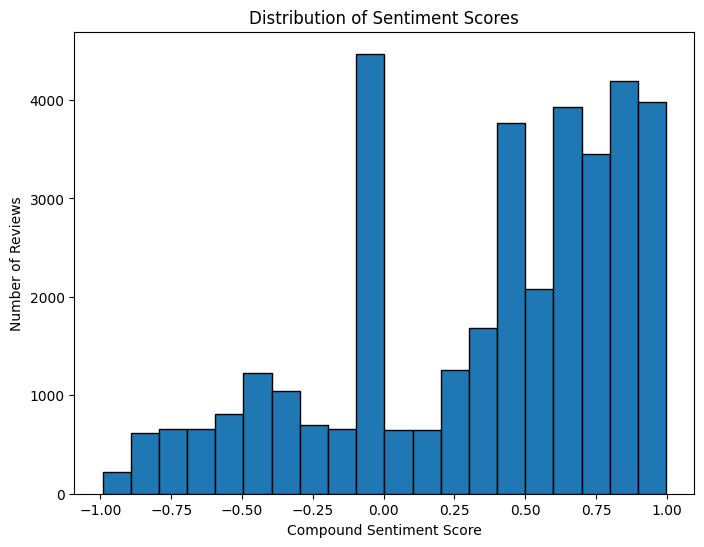

In [103]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize NLTK's VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def analyze_sentiment(review):
    if isinstance(review, str):
        scores = sid.polarity_scores(review)
    else:
        scores = sid.polarity_scores("")
    return scores

# Apply sentiment analysis to each review in reviews_df
reviews_df['Sentiment_Scores'] = reviews_df['Translated_Review'].apply(analyze_sentiment)

# Extract compound sentiment score and add it as a new column
reviews_df['Compound_Score'] = reviews_df['Sentiment_Scores'].apply(lambda x: x['compound'])

# Aggregate sentiment analysis results
average_sentiment = reviews_df['Compound_Score'].mean()
positive_reviews = reviews_df[reviews_df['Compound_Score'] >= 0.05]
negative_reviews = reviews_df[reviews_df['Compound_Score'] <= -0.05]

# Print summary statistics
print(f"Average Sentiment Score: {average_sentiment:.2f}")
print(f"Number of Positive Reviews: {len(positive_reviews)}")
print(f"Number of Negative Reviews: {len(negative_reviews)}")

# Optionally, visualize sentiment distribution or trends
# Example: Plotting sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(reviews_df['Compound_Score'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()


Sentiment scores around 0.0 are prevalent, with over 4000 occurrences. These scores typically indicate neutral sentiments where opinions expressed are neither distinctly positive nor negative.

Conversely, sentiment scores ranging from 0.75 to 1.00 are nearly comparable in frequency to the neutral scores. These higher scores signify extremely positive sentiments, suggesting that a substantial number of reviews express very favorable opinions and experiences.

This distribution highlights a spectrum of sentiments within the dataset, from predominantly neutral to highly positive, reflecting varying degrees of user satisfaction or critique in the reviews analyzed.

#Interactive Visualization

In [104]:
import plotly.express as px

fig = px.scatter(reviews_df, x='Sentiment_Polarity', y='Sentiment_Subjectivity', color='Sentiment',
                 hover_name='App', hover_data=['Translated_Review'],
                 title='Sentiment Analysis: Polarity vs. Subjectivity')

fig.update_layout(
    xaxis_title='Sentiment Polarity',
    yaxis_title='Sentiment Subjectivity'
)

fig.show()


The sentiment analysis reveals that positive sentiment scores are heavily concentrated.

Scores around 0.75 to 1.00, indicating strongly positive sentiments, are particularly prominent in the dataset.

This concentration suggests that a significant proportion of the analyzed reviews express highly favorable opinions or experiences.

**More Visualizations**

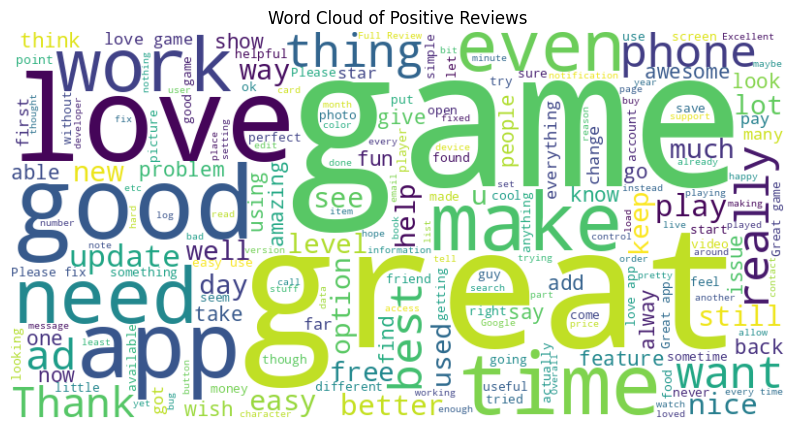

In [105]:
import plotly.express as px
from wordcloud import WordCloud

positive_reviews = reviews_df[reviews_df['Compound_Score'] >= 0.05]['Translated_Review'].values
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

fig = px.histogram(reviews_df, x='Compound_Score', nbins=20, title='Histogram of Sentiment Scores')
fig.update_layout(xaxis_title='Compound Sentiment Score', yaxis_title='Count')
fig.show()


The sentiment analysis of the dataset reveals compelling insights into user opinions and experiences:

Positive Sentiments Dominant: The majority of reviews express strongly positive sentiments, with sentiment scores predominantly clustering between 0.75 and 1.00. This indicates widespread satisfaction and positive feedback from users.

Neutral Sentiments: While positive sentiments are prevalent, a notable portion of reviews also exhibit neutral sentiment scores around 0.0. These reviews suggest a balanced viewpoint where opinions are neither distinctly positive nor negative.

Implications for Decision Making: The concentration of positive sentiments underscores the overall satisfaction of users with the product or service analyzed. This positive sentiment can be leveraged to reinforce marketing strategies, improve user engagement, and prioritize areas that contribute to positive user experiences.

The analysis of frequently occurring positive words in user reviews reveals key themes and sentiments:

Positive User Engagement: Words such as "love", "thank", "great", and "good" indicate strong positive sentiment and satisfaction among users. These words reflect appreciation and enjoyment of the product or service analyzed.

Functional Excellence: Words like "app", "work", "make", and "easy" highlight the functional aspects valued by users. Positive reviews often emphasize ease of use, functionality, and the overall positive impact on user experience.

# Summary Analysis

Certainly! Here's an overall combined summary of the analysis conducted:

### Overall Summary

#### Dataset Overview
- **Apps Dataset:** Analyzed data from the Google Play Store Apps dataset, including information on app categories, ratings, reviews, sizes, installs, and more.
- **Reviews Dataset:** Explored user reviews data with sentiment analysis, focusing on sentiment polarity and subjectivity.

#### Data Preparation and Cleaning
- **Data Cleaning:** Removed duplicates, handled missing values, standardized formats, and ensured data accuracy for both the Apps and Reviews datasets.
- **Exploratory Data Analysis (EDA):** Conducted detailed EDA, including univariate and bivariate analyses to understand distributions, relationships, and trends in the data.

#### Metrics Analysis
- **Apps Dataset Metrics:** Examined app ratings, sizes, popularity trends, and pricing across different categories.
- **Sentiment Analysis:** Assessed user sentiments through reviews, identifying dominant positive sentiments and exploring sentiments based on polarity and subjectivity.

#### Visualizations and Insights
- **Interactive Visualizations:** Utilized tools like Plotly for interactive scatter plots, histograms, and word clouds to visualize sentiment distributions and common positive sentiments.
- **Insights Integration:** Integrated insights from data visualization courses to enhance visual storytelling and data-driven decision-making.

#### Conclusion and Recommendations
- **Positive Sentiments:** The analysis revealed that a significant proportion of reviews expressed highly positive sentiments, indicating widespread satisfaction among users.
- **Functional Excellence:** Key positive words like "love", "thank", "great", and "easy" underscored user appreciation for functional aspects and ease of use in apps.
- **Strategic Implications:** Recommendations include leveraging positive sentiment for marketing strategies, enhancing product features based on user feedback, and continuous monitoring of sentiment trends for proactive improvements.

#### Future Directions
- **Further Analysis:** Opportunities for future analysis include deeper dives into specific app categories, temporal sentiment trends, and advanced sentiment analysis techniques like aspect-based sentiment analysis.
- **Predictive Insights:** Consideration of predictive modeling to forecast sentiment trends and anticipate user preferences based on historical data and external factors.

In summary, the comprehensive analysis of app data and user sentiments provides actionable insights for optimizing user satisfaction, enhancing product offerings, and driving strategic decisions in the app market.